In [2717]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2718]:
#reading the aviation csv file
aviation_df = pd.read_csv('AviationData.csv',encoding='latin-1')
aviation_df.head()

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [2719]:
aviation_df.shape

(88889, 31)

In [2720]:
#description of data
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [2721]:
#.describe to determine statistical nature of data
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [2722]:
#to determine missing values
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

The isnull method above helps determine null values in all the columns.The sum gives the exact number of null values per column.The results above shpw very high null figures in the Air carrier column.Other columns also show null value counts greater than half the number of entries of the data set.These include the Schedule,Aircraft category,latitude,longitude,Aircraft category.The next step is to start cleaning the dataset.

DATA CLEANING

1.HANDLING MISSING VALUES

A)DROPPING ROWS

In [2723]:
#Handling missing values in the aircraft column.
# .unique()helps determine unique values in the column
aviation_df['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [2724]:
aviation_df['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
ULTR                     1
Rocket                   1
Name: Aircraft.Category, dtype: int64

The Aircraft category column is the main column needed to give insight to the problem under consideration.The missing values can not be imputed as they are unique objects, and using other values will compromise the results of the analysis.This leaves dropping the missing rows as the only option.

In [2725]:
#dropping missing values of the Aircraft category column
aviation_df.dropna(subset=['Aircraft.Category'],inplace=True)

In [2726]:
#The number of rows and columns after dropping the null values in Aircraft category column
aviation_df.shape

(32287, 31)

In [2727]:
#To determine remaining missing values after dropping missing rows in Aircraft category column
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      9
Country                      12
Latitude                   6320
Longitude                  6330
Airport.Code              12669
Airport.Name              12108
Injury.Severity             884
Aircraft.damage            1458
Aircraft.Category             0
Registration.Number         273
Make                         12
Model                        33
Amateur.Built                19
Number.of.Engines          3457
Engine.Type                5540
FAR.Description             608
Schedule                  28799
Purpose.of.flight          4448
Air.carrier               18662
Total.Fatal.Injuries       3711
Total.Serious.Injuries     3720
Total.Minor.Injuries       3332
Total.Uninjured            1080
Weather.Condition          3663
Broad.phase.of.flight     24909
Report.Status              5959
Publication.Date           1191
dtype: i

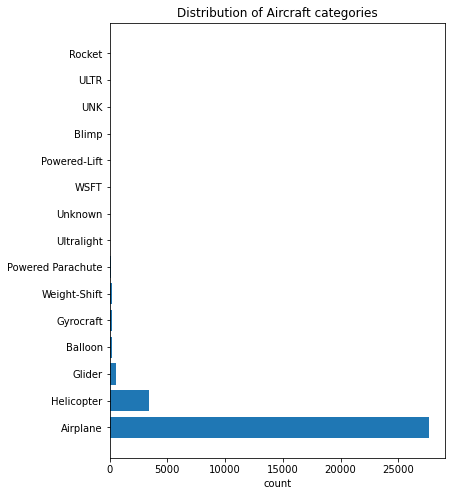

In [2728]:
#To visualize the aircraft category data set

fig,ax = plt.subplots(figsize=(6,8))
aviation_df_air_category_values = aviation_df['Aircraft.Category'].value_counts()
ax.barh(
y=aviation_df_air_category_values.index,
width=aviation_df_air_category_values.values

)
ax.set_title('Distribution of Aircraft categories');
ax.set_xlabel('count');

The bar graph above shows the distribution of the various aircraft types. Airplanes are the most common,followed from a far by Helicopters.

In [2729]:
#Handling missing values in the air carrier column.
# .unique()helps determine unique values in the column
aviation_df['Air.carrier'].unique()

array(['Air Canada', nan, 'Rocky Mountain Helicopters, In', ...,
       'REACH AIR MEDICAL SERVICES LLC', 'SKY WEST AVIATION INC TRUSTEE',
       'GERBER RICHARD E'], dtype=object)

In [2730]:
aviation_df['Air.carrier'].value_counts().head(20)

Pilot                      257
American Airlines           47
United Airlines             43
Delta Air Lines             42
SOUTHWEST AIRLINES CO       41
DELTA AIR LINES INC         32
ON FILE                     27
AMERICAN AIRLINES INC       27
Private Individual          24
Southwest Airlines          21
Ryanair                     21
UNITED AIR LINES INC        20
AIR METHODS CORP            17
CIVIL AIR PATROL INC        16
SKYWEST AIRLINES INC        15
Private                     15
Air Canada                  14
Unknown                     13
US AIRWAYS INC              12
Air Methods Corporation     12
Name: Air.carrier, dtype: int64

In [2731]:
#dropping missing values of the Air carrier column
aviation_df.dropna(subset=['Air.carrier'],inplace=True)

The Air carrier column is another  column that gives additonal insight to the problem under consideration.The missing values can not be imputed as they are unique objects, and using other values will compromise the results of the analysis.This leaves dropping the missing rows as the only option.

In [2732]:
aviation_df['Air.carrier'].unique()

array(['Air Canada', 'Rocky Mountain Helicopters, In', 'Lang Air Service',
       ..., 'REACH AIR MEDICAL SERVICES LLC',
       'SKY WEST AVIATION INC TRUSTEE', 'GERBER RICHARD E'], dtype=object)

In [2733]:
aviation_df['Air.carrier'].value_counts().head(20)

Pilot                      257
American Airlines           47
United Airlines             43
Delta Air Lines             42
SOUTHWEST AIRLINES CO       41
DELTA AIR LINES INC         32
AMERICAN AIRLINES INC       27
ON FILE                     27
Private Individual          24
Ryanair                     21
Southwest Airlines          21
UNITED AIR LINES INC        20
AIR METHODS CORP            17
CIVIL AIR PATROL INC        16
SKYWEST AIRLINES INC        15
Private                     15
Air Canada                  14
Unknown                     13
Air Methods Corporation     12
US AIRWAYS INC              12
Name: Air.carrier, dtype: int64

In [2734]:
#The number of rows and columns after dropping the null values in Air carrier column
aviation_df.shape

(13625, 31)

In [2735]:
#To determine remaining missing values after dropping missing rows in Air carrier column
aviation_df.isnull().sum()

c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       1
Latitude                   1266
Longitude                  1265
Airport.Code               5043
Airport.Name               4897
Injury.Severity             458
Aircraft.damage             912
Aircraft.Category             0
Registration.Number           6
Make                          4
Model                        10
Amateur.Built                 0
Number.of.Engines          1263
Engine.Type                2437
FAR.Description             171
Schedule                  11106
Purpose.of.flight          2607
Air.carrier                   0
Total.Fatal.Injuries        102
Total.Serious.Injuries       99
Total.Minor.Injuries        105
Total.Uninjured              18
Weather.Condition          1611
Broad.phase.of.flight     13273
Report.Status              2733
Publication.Date            353
dtype: i

The other main columns are the aircraft damage,weather condition,aircraft category,FAR Description and the engine type columns.

In [2736]:
aviation_df['Aircraft.damage'].unique()

array(['Substantial', 'Destroyed', nan, 'Minor', 'Unknown'], dtype=object)

In [2737]:
#checking the contents and quantity of values in the aircraft damage column
aviation_df['Aircraft.damage'].value_counts()

Substantial    10675
Destroyed       1323
Minor            675
Unknown           40
Name: Aircraft.damage, dtype: int64

In [2738]:
#dropping missing values in the aircraft damage column, then checking remaining missing values in other columns.
aviation_df.dropna(subset=['Aircraft.damage'],inplace=True)
aviation_df.isnull().sum()


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       1
Latitude                    873
Longitude                   873
Airport.Code               4479
Airport.Name               4343
Injury.Severity             209
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           1
Make                          3
Model                         9
Amateur.Built                 0
Number.of.Engines           977
Engine.Type                2006
FAR.Description             108
Schedule                  10811
Purpose.of.flight          1863
Air.carrier                   0
Total.Fatal.Injuries         89
Total.Serious.Injuries       95
Total.Minor.Injuries         94
Total.Uninjured              17
Weather.Condition          1159
Broad.phase.of.flight     12402
Report.Status              2263
Publication.Date            258
dtype: i

In [2739]:
#checking the number of rows and columns after dropping the missing values in Aircraft Damage column
aviation_df.shape

(12713, 31)

In [2740]:
#checking unique values in the weather condition column
aviation_df['Weather.Condition'].unique()

array(['VMC', 'IMC', 'UNK', nan, 'Unk'], dtype=object)

In [2741]:
#dropping missing values in the weather condition column, then checking remaining missing values in other columns
aviation_df.dropna(subset=['Weather.Condition'],inplace=True)
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       1
Latitude                    342
Longitude                   342
Airport.Code               3713
Airport.Name               3560
Injury.Severity              42
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          3
Model                         4
Amateur.Built                 0
Number.of.Engines           470
Engine.Type                1189
FAR.Description              15
Schedule                  10040
Purpose.of.flight          1119
Air.carrier                   0
Total.Fatal.Injuries         88
Total.Serious.Injuries       93
Total.Minor.Injuries         92
Total.Uninjured              15
Weather.Condition             0
Broad.phase.of.flight     11245
Report.Status              1220
Publication.Date             85
dtype: i

In [2742]:
#checking the number of rows and columns after dropping the missing values in weather condition column
aviation_df.shape

(11554, 31)

In [2743]:
#checking unique values in the engine type column
aviation_df['Engine.Type'].unique()

array(['Turbo Fan', 'Turbo Shaft', 'Reciprocating', 'Turbo Prop',
       'Turbo Jet', nan, 'Unknown', 'Electric', 'None', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [2744]:
#dropping missing values in the Engine type column, then checking remaining missing values in other columns
aviation_df.dropna(subset=['Engine.Type'],inplace=True)
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       1
Latitude                    282
Longitude                   282
Airport.Code               3224
Airport.Name               3049
Injury.Severity              25
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          1
Model                         3
Amateur.Built                 0
Number.of.Engines           217
Engine.Type                   0
FAR.Description               4
Schedule                   9095
Purpose.of.flight           954
Air.carrier                   0
Total.Fatal.Injuries         85
Total.Serious.Injuries       90
Total.Minor.Injuries         89
Total.Uninjured              15
Weather.Condition             0
Broad.phase.of.flight     10059
Report.Status               350
Publication.Date              2
dtype: i

In [2745]:
#checking the number of rows and columns after dropping the missing values in engine type column
aviation_df.shape

(10365, 31)

In [2746]:
#checking unique values in the FAR Description column
aviation_df['FAR.Description'].unique()

array(['Part 129: Foreign', 'Part 135: Air Taxi & Commuter',
       'Part 121: Air Carrier', '091', '135', '137', '121', 'NUSC', '133',
       '091K', 'NUSN', '129', 'PUBU', 'UNK', '125', nan, '437', '103'],
      dtype=object)

In [2747]:
#dropping missing values in the FAR Description column, then checking remaining missing values in other columns
aviation_df.dropna(subset=['FAR.Description'],inplace=True)
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       1
Latitude                    281
Longitude                   281
Airport.Code               3223
Airport.Name               3048
Injury.Severity              25
Aircraft.damage               0
Aircraft.Category             0
Registration.Number           0
Make                          1
Model                         3
Amateur.Built                 0
Number.of.Engines           217
Engine.Type                   0
FAR.Description               0
Schedule                   9093
Purpose.of.flight           950
Air.carrier                   0
Total.Fatal.Injuries         85
Total.Serious.Injuries       90
Total.Minor.Injuries         89
Total.Uninjured              15
Weather.Condition             0
Broad.phase.of.flight     10055
Report.Status               347
Publication.Date              2
dtype: i

In [2748]:
#checking the number of rows and columns after dropping the missing values in FAR Description column
aviation_df.shape

(10361, 31)

On dropping the six columns' missing values,Aircraft category,Air carrier,weather condition,Aircraft damage,Engine type and FAR Description,there was a drop in the number of rows in the data set from 88889 rows to 10361. The above could not be avoided as there are already 'unknown' values within the columns.Imputing any values would compromise the integrity of the outcome of the analysis.

In [2749]:
# dropping the below rows as they cannot be imputed
aviation_df.dropna(subset=['Make','Model','Registration.Number','Country','Location','Amateur.Built','Report.Status'],inplace=True)

In [2750]:
aviation_df.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Latitude                   249
Longitude                  249
Airport.Code              3042
Airport.Name              2879
Injury.Severity             22
Aircraft.damage              0
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines          165
Engine.Type                  0
FAR.Description              0
Schedule                  8803
Purpose.of.flight          866
Air.carrier                  0
Total.Fatal.Injuries        84
Total.Serious.Injuries      89
Total.Minor.Injuries        88
Total.Uninjured             15
Weather.Condition            0
Broad.phase.of.flight     9707
Report.Status                0
Publication.Date             0
dtype: int64

In [2751]:
aviation_df.shape

(10011, 31)

B)DROPPING COLUMNS

The above result shows the missing values in the other remaining columns after some rows have been dropped.Some columns are not significant in the analysis of the problem at hand, hence they can be dropped.These include the Airport code,Airport Name and Schedule columns.

In [2752]:
#dropping columns Airport code,Airport name and Schedule
aviation_df.drop (columns=['Airport.Code','Airport.Name','Schedule'],inplace = True)

In [2753]:
# No. of rows and columns after dropping Airport code,Airport name and Schedule
aviation_df.shape

(10011, 28)

In [2754]:
aviation_df.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Latitude                   249
Longitude                  249
Injury.Severity             22
Aircraft.damage              0
Aircraft.Category            0
Registration.Number          0
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines          165
Engine.Type                  0
FAR.Description              0
Purpose.of.flight          866
Air.carrier                  0
Total.Fatal.Injuries        84
Total.Serious.Injuries      89
Total.Minor.Injuries        88
Total.Uninjured             15
Weather.Condition            0
Broad.phase.of.flight     9707
Report.Status                0
Publication.Date             0
dtype: int64

In [2755]:
#checking unique values in the purpose of flight column
aviation_df['Purpose.of.flight'].unique()

array([nan, 'Unknown', 'Business', 'Personal', 'Instructional',
       'Positioning', 'Aerial Application', 'Other Work Use',
       'Glider Tow', 'Executive/corporate', 'Flight Test',
       'External Load', 'Public Aircraft', 'Aerial Observation',
       'Banner Tow', 'Skydiving', 'Public Aircraft - Local',
       'Air Race show', 'Ferry', 'Public Aircraft - Federal',
       'Firefighting', 'Public Aircraft - State', 'Air Drop', 'PUBL',
       'PUBS'], dtype=object)

In [2756]:
#checking unique values in the broad phase of flight column
aviation_df['Broad.phase.of.flight'].unique()

array(['Climb', 'Approach', 'Cruise', 'Taxi', 'Takeoff', 'Landing',
       'Maneuvering', 'Standing', 'Descent', 'Go-around', 'Other',
       'Unknown', nan], dtype=object)

From the two cells above,the unique values shown do not have a great impact on the analysis/ problem at hand.The phase and purpose of flight are not determining factors when analysing accidents with an aim of buying an airplane. Hence,the two columns can be dropped.The total uninjured column does not offer much insight in the current problem,hence it can also be dropped.

In [2757]:
#Dropping phase and purpose of flight columns.
aviation_df.drop (columns=['Broad.phase.of.flight','Purpose.of.flight','Total.Uninjured'],inplace = True)

In [2758]:
aviation_df.shape

(10011, 25)

In [2759]:
aviation_df.isnull().sum()

Event.Id                    0
Investigation.Type          0
Accident.Number             0
Event.Date                  0
Location                    0
Country                     0
Latitude                  249
Longitude                 249
Injury.Severity            22
Aircraft.damage             0
Aircraft.Category           0
Registration.Number         0
Make                        0
Model                       0
Amateur.Built               0
Number.of.Engines         165
Engine.Type                 0
FAR.Description             0
Air.carrier                 0
Total.Fatal.Injuries       84
Total.Serious.Injuries     89
Total.Minor.Injuries       88
Weather.Condition           0
Report.Status               0
Publication.Date            0
dtype: int64

CHECKING UNIQUE VALUES IN THE REMAINING COLUMNS

In [2760]:
aviation_df['Longitude'].unique()

array([-70.758333, nan, '-113.983333', ..., '1584954W', '0091339W',
       '0087365W'], dtype=object)

In [2761]:
aviation_df['Latitude'].unique()

array([42.445277000000004, nan, '35.988611', ..., '562341N', '452620N',
       '040122N'], dtype=object)

In [2762]:
aviation_df['Number.of.Engines'].unique()

array([ 2.,  1.,  4.,  3., nan,  0.,  8.])

In [2763]:
aviation_df['Injury.Severity'].unique()

array(['Non-Fatal', 'Fatal(2)', 'Incident', 'Fatal(1)', 'Fatal(4)',
       'Fatal(5)', 'Fatal(3)', 'Fatal(8)', 'Fatal(10)', 'Fatal(27)',
       'Fatal(9)', 'Fatal(6)', 'Fatal(13)', 'Fatal', nan, 'Minor',
       'Serious'], dtype=object)

In [2764]:
aviation_df.loc[:,('Injury.Severity','Number.of.Engines','Latitude','Longitude')].fillna('Unknown',inplace=True)

In [2765]:
aviation_df.fillna({'Injury.Severity':'Unknown',
                   'Number.of.Engines':'Unknown',
                   'Latitude':'Unknown',
                   'Longitude':'Unknown'},inplace=True)

In [2766]:
aviation_df.isnull().sum()

Event.Id                   0
Investigation.Type         0
Accident.Number            0
Event.Date                 0
Location                   0
Country                    0
Latitude                   0
Longitude                  0
Injury.Severity            0
Aircraft.damage            0
Aircraft.Category          0
Registration.Number        0
Make                       0
Model                      0
Amateur.Built              0
Number.of.Engines          0
Engine.Type                0
FAR.Description            0
Air.carrier                0
Total.Fatal.Injuries      84
Total.Serious.Injuries    89
Total.Minor.Injuries      88
Weather.Condition          0
Report.Status              0
Publication.Date           0
dtype: int64

DEALING WITH NUMERICAL COLUMNS

In [2767]:
#Three columns still have missing values,they contain numerical values hence the descibe method is used in getting more statistical data on the columns.
aviation_df.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
count,9927.000000,9922.000000,9923.000000
mean,0.287398,0.306793,0.176761
std,1.021581,2.062478,0.941547
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,49.000000,137.000000,50.000000


In [2768]:
aviation_df['Total.Fatal.Injuries'].unique()

array([nan,  0.,  2.,  1.,  4.,  5.,  3.,  8., 10., 27.,  9.,  6., 13.,
        7., 49., 14., 12., 11.])

In [2769]:
aviation_df['Total.Fatal.Injuries'].value_counts()

0.0     8421
1.0      816
2.0      411
3.0      140
4.0       74
5.0       28
6.0       11
7.0        6
8.0        5
9.0        5
10.0       4
11.0       1
14.0       1
12.0       1
49.0       1
13.0       1
27.0       1
Name: Total.Fatal.Injuries, dtype: int64

In [2770]:
aviation_df['Total.Serious.Injuries'].unique()

array([ nan,   0.,   2.,   1.,   4.,   5.,  10.,   8.,   3.,   7.,   9.,
         6.,  11.,  25., 137.,  19.,  21.,  27.,  20., 125.,  22.])

In [2771]:
aviation_df['Total.Serious.Injuries'].value_counts()

0.0      8166
1.0      1163
2.0       416
3.0        98
4.0        39
5.0        14
6.0         6
7.0         5
8.0         4
25.0        1
137.0       1
20.0        1
22.0        1
27.0        1
10.0        1
125.0       1
9.0         1
21.0        1
11.0        1
19.0        1
Name: Total.Serious.Injuries, dtype: int64

In [2772]:
aviation_df['Total.Minor.Injuries'].unique()

array([ 1.,  0.,  3.,  2., 24.,  5., 25., nan, 19.,  4.,  6., 12.,  9.,
       42.,  7., 50.,  8.])

In [2773]:
aviation_df['Total.Minor.Injuries'].value_counts()

0.0     8787
1.0      843
2.0      196
3.0       57
4.0       17
5.0        7
6.0        4
9.0        3
7.0        2
50.0       1
19.0       1
42.0       1
25.0       1
8.0        1
12.0       1
24.0       1
Name: Total.Minor.Injuries, dtype: int64

The standard deviations of the above three columns indicate the values are clustered closely near the mean value. Hence the mean values can be used in place of the missing values.

In [2774]:
#replacing the missing values with the column means
aviation_df.fillna({
    'Total.Fatal.Injuries':aviation_df['Total.Fatal.Injuries'].mean(),
    'Total.Serious.Injuries':aviation_df['Total.Serious.Injuries'].mean(),
    'Total.Minor.Injuries':aviation_df['Total.Minor.Injuries'].mean()
},inplace=True)

In [2775]:
#checking remaining missing values in other columns
aviation_df.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Weather.Condition         0
Report.Status             0
Publication.Date          0
dtype: int64

In [2776]:
aviation_df.shape

(10011, 25)

The above data set has been cleaned of all missing values.It currently has 10011 rows and 25 columns.Initially before the cleaning there were 88889 rows and 31 columns.The next step is checking for duplicates in the data set as duplicates alter the outcome of the data set analysis,

In [2777]:
#checking for duplicates
aviation_df.duplicated().unique()

array([False])

The false outcome result shows no data has been duplicated.The next step is checking for outliers.Outliers have an impact on the outcome of the dataset analysis,and might misrepresent the results.

In [2778]:
aviation_df.describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
count,10011.000000,10011.000000,10011.000000
mean,0.287398,0.306793,0.176761
std,1.017286,2.053289,0.937399
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,49.000000,137.000000,50.000000


HANDLING OUTLIERS

Total fatal injuries

In [2779]:
#handling outliers
Q1=aviation_df['Total.Fatal.Injuries'].quantile(0.25)
Q3=aviation_df['Total.Fatal.Injuries'].quantile(0.75)
IQR=Q3-Q1
IQR


0.0

In [2780]:
Q1

0.0

In [2781]:
Q3

0.0

From the above analysis,the first and third quantile values are zero.This shows that the middle values(50%),IQR,are closely knit.From the data description the standard deviation of the fatal injuries column is 1.01,showing minimum deviation from the mean.

In [2782]:
#DEFINE OUTLIER BOUNDARIES
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
upper_bound

0.0

In [2783]:
#filter out outliers
aviation_df_Total_Fatal_Injuries_outliers = ((aviation_df['Total.Fatal.Injuries'] <lower_bound) & (aviation_df['Total.Fatal.Injuries'] > upper_bound))
aviation_df_Total_Fatal_Injuries_outliers.sum()

0

In [2784]:
aviation_df['Total.Fatal.Injuries'].value_counts()

0.000000     8421
1.000000      816
2.000000      411
3.000000      140
0.287398       84
4.000000       74
5.000000       28
6.000000       11
7.000000        6
8.000000        5
9.000000        5
10.000000       4
49.000000       1
12.000000       1
14.000000       1
27.000000       1
13.000000       1
11.000000       1
Name: Total.Fatal.Injuries, dtype: int64

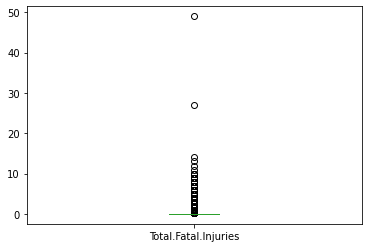

In [2785]:
aviation_df['Total.Fatal.Injuries'].plot.box();

Total serious injuries

In [2786]:
Q4=aviation_df['Total.Serious.Injuries'].quantile(0.25)
Q6=aviation_df['Total.Serious.Injuries'].quantile(0.75)
IQR=Q6-Q4
IQR

0.0

In [2787]:
Q4

0.0

In [2788]:
Q6

0.0

In [2789]:
#DEFINE OUTLIER BOUNDARIES
lower_bound = Q4 - 1.5*IQR
upper_bound = Q6 + 1.5*IQR
upper_bound

0.0

In [2790]:
#filter out outliers
aviation_df_Total_Serious_Injuries_outliers = ((aviation_df['Total.Serious.Injuries'] <lower_bound) & (aviation_df['Total.Serious.Injuries'] > upper_bound))
aviation_df_Total_Serious_Injuries_outliers.sum()

0

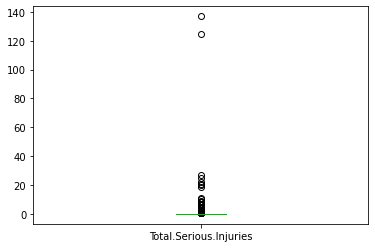

In [2791]:
aviation_df['Total.Serious.Injuries'].plot.box();

Total minor injuries

In [2792]:
Q7=aviation_df['Total.Minor.Injuries'].quantile(0.25)
Q9=aviation_df['Total.Minor.Injuries'].quantile(0.75)
IQR=Q9-Q7
IQR

0.0

In [2793]:
Q7

0.0

In [2794]:
Q9

0.0

In [2795]:
#DEFINE OUTLIER BOUNDARIES
lower_bound = Q7 - 1.5*IQR
upper_bound = Q9 + 1.5*IQR
upper_bound

0.0

In [2796]:
#filter out outliers
aviation_df_Total_Minor_Injuries_outliers = ((aviation_df['Total.Minor.Injuries'] <lower_bound) & (aviation_df['Total.Minor.Injuries'] > upper_bound))
aviation_df_Total_Minor_Injuries_outliers.sum()

0

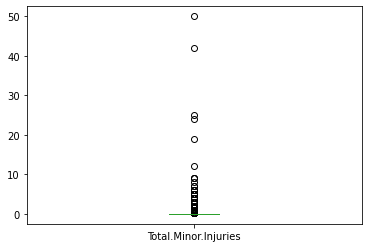

In [2797]:
aviation_df['Total.Minor.Injuries'].plot.box();

In [2798]:
aviation_df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines          object
Engine.Type                object
FAR.Description            object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Weather.Condition          object
Report.Status              object
Publication.Date           object
dtype: object

In [2799]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,...,Number.of.Engines,Engine.Type,FAR.Description,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Weather.Condition,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,Non-Fatal,Substantial,...,2,Turbo Fan,Part 129: Foreign,Air Canada,0.287398,0.306793,1.0,VMC,Probable Cause,19-09-2017
22,20020917X01657,Accident,ATL82DA027,1982-01-02,"CHAMBLEE, GA",United States,Unknown,Unknown,Non-Fatal,Substantial,...,1,Turbo Shaft,Part 135: Air Taxi & Commuter,"Rocky Mountain Helicopters, In",0.000000,0.000000,0.0,VMC,Probable Cause,02-01-1983
33,20020917X02254,Accident,LAX82FA038,1982-01-04,"NEAR LAS VEGAS, NV",United States,Unknown,Unknown,Fatal(2),Destroyed,...,2,Reciprocating,Part 135: Air Taxi & Commuter,Lang Air Service,2.000000,0.000000,0.0,VMC,Probable Cause,04-01-1983
39,20020917X01906,Accident,DCA82AA009,1982-01-05,"ITHACA, NY",United States,Unknown,Unknown,Fatal(2),Destroyed,...,2,Reciprocating,Part 135: Air Taxi & Commuter,Empire Airlines,2.000000,0.000000,0.0,VMC,Probable Cause,05-01-1983
43,20020917X02156,Accident,LAX82DA037,1982-01-05,"SPRINGERVILLE, AZ",United States,Unknown,Unknown,Non-Fatal,Substantial,...,1,Reciprocating,Part 135: Air Taxi & Commuter,Joel Frederick's Monarch Air,0.000000,0.000000,0.0,VMC,Probable Cause,05-01-1983


PARSING DATES

In [2800]:
#parsing dates to date time format,applying the coerce to indicate invalid dates
aviation_df[['Publication.Date','Event.Date']]= aviation_df[['Publication.Date','Event.Date']].apply(pd.to_datetime,errors='coerce')
aviation_df[['Publication.Date','Event.Date']].head()

,Publication.Date,Event.Date
5,2017-09-19,1979-09-17
22,1983-02-01,1982-01-02
33,1983-04-01,1982-01-04
39,1983-05-01,1982-01-05
43,1983-05-01,1982-01-05


HANDLING INCONSISTENT DATA

In [2801]:
#determining data types of the column values
aviation_df.dtypes

Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
Location                          object
Country                           object
Latitude                          object
Longitude                         object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                 object
Engine.Type                       object
FAR.Description                   object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.Injuries           float64
Total.Minor.Injuries             float64
Weather.Condition                 object
Report.Status                     object
Publication.Date

In [2802]:
#converting the number of engines column to numeric form
aviation_df['Number.of.Engines']=pd.to_numeric(aviation_df['Number.of.Engines'],errors='coerce')

aviation_df['Number.of.Engines'].unique()

array([ 2.,  1.,  4.,  3., nan,  0.,  8.])

VISUALIZING DATA

In [2809]:
aircraft_cat_mean_viz=aviation_df.groupby(['Aircraft.Category']).mean()
aircraft_cat_mean_viz

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
Aircraft.Category,,,,
Airplane,1.166405,0.282417,0.296994,0.163606
Balloon,2.600000,0.000000,2.166667,0.833333
Blimp,1.000000,0.000000,0.000000,1.000000
Glider,0.857143,0.137931,0.241379,0.172414
Gyrocraft,1.000000,0.264706,0.411765,0.235294
Helicopter,1.075594,0.316326,0.351818,0.226333
Powered Parachute,1.000000,0.171429,0.457143,0.771429
Rocket,1.000000,1.000000,0.000000,1.000000
Ultralight,1.166667,0.333333,0.000000,0.500000


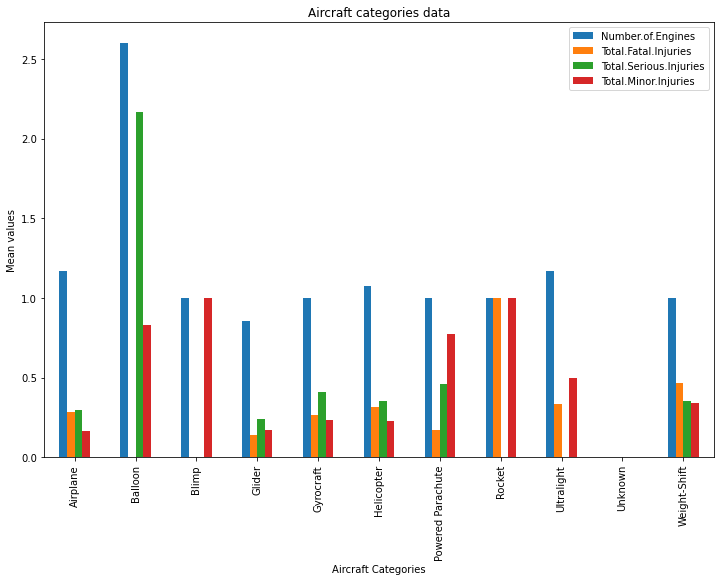

In [ ]:
#visualizing the aircraft categories statistical data-means
aircraft_cat_mean_viz.plot(kind='bar',figsize=(12,8));
plt.xlabel('Aircraft Categories');
plt.ylabel('Mean values');
plt.title('Aircraft categories data');


From the above aircraft categories graph,it can be seen that blimp had only minor injuries,though the number was quite high compared to the other aircraft.
The glider is seen to have the lowest number of fatal,serious and minor injuries combined, followed by the airplane.
Ballon appears to have the highest number of engines as well as highest number of serious injuries.


In [2811]:
aircraft_cat_sum_viz=aviation_df.groupby(['Aircraft.Category']).sum()
aircraft_cat_sum_viz

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
Aircraft.Category,,,,
Airplane,9666.0,2375.692656,2498.316267,1376.257080
Balloon,13.0,0.000000,13.000000,5.000000
Blimp,1.0,0.000000,0.000000,1.000000
Glider,24.0,4.000000,7.000000,5.000000
Gyrocraft,34.0,9.000000,14.000000,8.000000
Helicopter,1494.0,450.448776,500.988309,322.297894
Powered Parachute,35.0,6.000000,16.000000,27.000000
Rocket,1.0,1.000000,0.000000,1.000000
Ultralight,7.0,2.000000,0.000000,3.000000


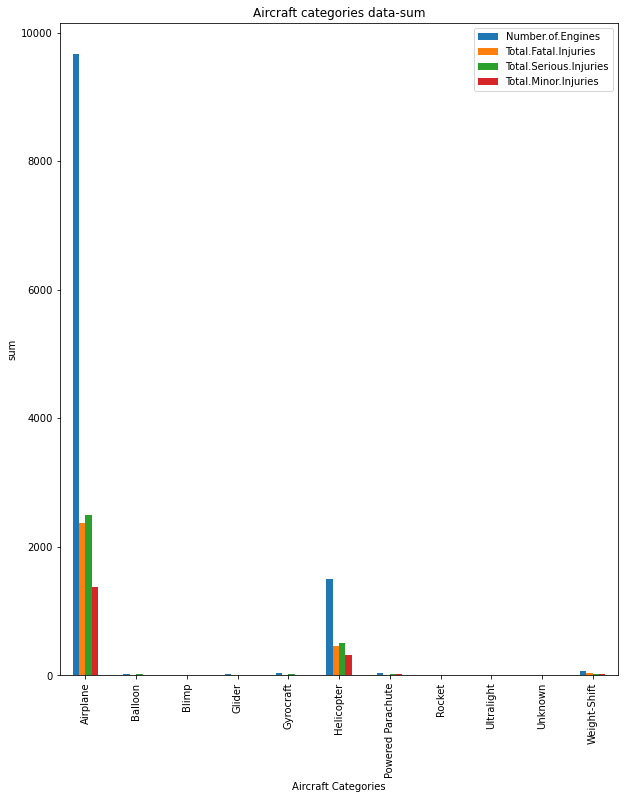

In [2814]:
#visualizing the aircraft categories statistical data-sum
aircraft_cat_sum_viz.plot(kind='bar',figsize=(10,12));
plt.xlabel('Aircraft Categories');
plt.ylabel('sum');
plt.title('Aircraft categories data-sum');


The sums graph shows that cumulatively the total number of fatal,serious and minor injuries over the given duration is the highest.Its followed by the helicopter.

In [2822]:
#checking the number of air carriers per aircraft category
aircraft_cat_carrier_viz=aviation_df.groupby(['Aircraft.Category'])['Air.carrier'].value_counts()
aircraft_cat_carrier_viz

Aircraft.Category  Air.carrier           
Airplane           Pilot                     195
                   ON FILE                    21
                   SOUTHWEST AIRLINES CO      17
                   American Airlines          13
                   Private Individual         11
                                            ... 
Weight-Shift       TANDIELD THEODORE E JR      1
                   Tedd R. Hecklin             1
                   Thomas Parnow               1
                   WENDELBURG KEVIN R          1
                   WENZEL JONATHON             1
Name: Air.carrier, Length: 8898, dtype: int64

The .value count() method above shows the pilot aircarrier,an airplane,is the most commonly bought/used.

In [2830]:
aviation_df.groupby(['Aircraft.Category'])['Publication.Date'].value_counts()

Aircraft.Category  Publication.Date
Airplane           2020-09-25          7207
                   2020-09-26           274
                   2020-03-11            60
                   2021-08-20            49
                   2020-03-12            32
                                       ... 
Ultralight         2020-09-25             6
Unknown            2020-09-25             1
Weight-Shift       2020-09-25            59
                   2020-03-11             2
                   2021-05-20             1
Name: Publication.Date, Length: 399, dtype: int64

In [2826]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Injury.Severity,Aircraft.damage,...,Number.of.Engines,Engine.Type,FAR.Description,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Weather.Condition,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,Non-Fatal,Substantial,...,2.0,Turbo Fan,Part 129: Foreign,Air Canada,0.287398,0.306793,1.0,VMC,Probable Cause,2017-09-19
22,20020917X01657,Accident,ATL82DA027,1982-01-02,"CHAMBLEE, GA",United States,Unknown,Unknown,Non-Fatal,Substantial,...,1.0,Turbo Shaft,Part 135: Air Taxi & Commuter,"Rocky Mountain Helicopters, In",0.000000,0.000000,0.0,VMC,Probable Cause,1983-02-01
33,20020917X02254,Accident,LAX82FA038,1982-01-04,"NEAR LAS VEGAS, NV",United States,Unknown,Unknown,Fatal(2),Destroyed,...,2.0,Reciprocating,Part 135: Air Taxi & Commuter,Lang Air Service,2.000000,0.000000,0.0,VMC,Probable Cause,1983-04-01
39,20020917X01906,Accident,DCA82AA009,1982-01-05,"ITHACA, NY",United States,Unknown,Unknown,Fatal(2),Destroyed,...,2.0,Reciprocating,Part 135: Air Taxi & Commuter,Empire Airlines,2.000000,0.000000,0.0,VMC,Probable Cause,1983-05-01
43,20020917X02156,Accident,LAX82DA037,1982-01-05,"SPRINGERVILLE, AZ",United States,Unknown,Unknown,Non-Fatal,Substantial,...,1.0,Reciprocating,Part 135: Air Taxi & Commuter,Joel Frederick's Monarch Air,0.000000,0.000000,0.0,VMC,Probable Cause,1983-05-01
